In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer


In [12]:
df=pd.read_csv("hotel_bookings.csv")
df.shape

(119390, 32)

In [3]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
non_categorical_columns = df.select_dtypes(exclude='object').columns.tolist()
categorical_columns,non_categorical_columns

(['hotel',
  'arrival_date_month',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status',
  'reservation_status_date'],
 ['is_canceled',
  'lead_time',
  'arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'agent',
  'company',
  'days_in_waiting_list',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests'])

In [8]:
len(categorical_columns),len(non_categorical_columns)

(12, 20)

In [9]:
new_df=df[~df.duplicated()]
new_df.shape

(87396, 32)

In [10]:
119390-87396

31994

In [11]:
dict_null_values={}
for i in new_df.columns:
     if new_df[i].isnull().sum() >0:
        dict_null_values[i]=new_df[i].isnull().sum()
dict_null_values

{'children': 4, 'country': 452, 'agent': 12193, 'company': 82137}

In [12]:
# number of rows= 119390
# columns= Total 32 columns are there.
#         ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
#        'arrival_date_month', 'arrival_date_week_number',
#        'arrival_date_day_of_month', 'stays_in_weekend_nights',
#        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
#        'country', 'market_segment', 'distribution_channel',
#        'is_repeated_guest', 'previous_cancellations',
#        'previous_bookings_not_canceled', 'reserved_room_type',
#        'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
#        'company', 'days_in_waiting_list', 'customer_type', 'adr',
#        'required_car_parking_spaces', 'total_of_special_requests',
#        'reservation_status', 'reservation_status_date']
# data types=  12 categorical_columns and 20 non_categorical_columns columns 
#    categorical_columns- ['hotel',
#   'arrival_date_month',
#   'meal',
#   'country',
#   'market_segment',
#   'distribution_channel',
#   'reserved_room_type',
#   'assigned_room_type',
#   'deposit_type',
#   'customer_type',
#   'reservation_status',
#   'reservation_status_date']
# duplicate rows= 31994
# number of rows after deleting duplicate rows= 87396
# missing values= following columns has missing values-{'children': 4, 'country': 452, 'agent': 12193, 'company': 82137}

In [13]:
# Handling missing values-

In [14]:
new_df['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [15]:
# filling null values in   column "children" with value which is appearing most
new_df['children'].fillna(0,inplace=True)

In [16]:
new_df['country'].value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [17]:
new_df['country'].mode()

0    PRT
Name: country, dtype: object

In [18]:
# filling null values in   column "country" with value which is appearing most
new_df['country'].fillna("PRT",inplace=True)

In [19]:
new_df['agent'].value_counts()

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

In [20]:
new_df['agent'].mean(),new_df['agent'].median()

(94.13830565270003, 14.0)

In [21]:
# using KNN Imputer method for filing null vaues in column "agent"
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5,weights="uniform")
imputed_data = imputer.fit_transform(new_df[['agent']])

In [22]:
imputed_data

array([[94.13830565],
       [94.13830565],
       [94.13830565],
       ...,
       [ 9.        ],
       [89.        ],
       [ 9.        ]])

In [23]:
new_df['agent']=imputed_data

In [24]:
new_df['agent'].value_counts()

9.000000      28759
240.000000    13028
94.138306     12193
14.000000      3349
7.000000       3300
              ...  
257.000000        1
291.000000        1
93.000000         1
483.000000        1
449.000000        1
Name: agent, Length: 334, dtype: int64

In [25]:
82137/87396 * 100

93.98256213098998

In [26]:
# as column 'company' has 94% null rows so we can drop this column
new_df1 = new_df.drop(['company'], axis = 1)
new_df1.shape

(87396, 31)

In [27]:
dict_null_values={}
for i in new_df1.columns:
     if new_df1[i].isnull().sum() >0:
        dict_null_values[i]=new_df1[i].isnull().sum()
dict_null_values

{}

In [28]:
# EDA

In [29]:
# sns.pairplot(new_df1)

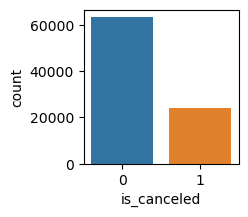

In [30]:
plt.figure(figsize=(2,2))
plt.title("")
sns.countplot(x=new_df1['is_canceled'])
plt.xticks()
plt.show()

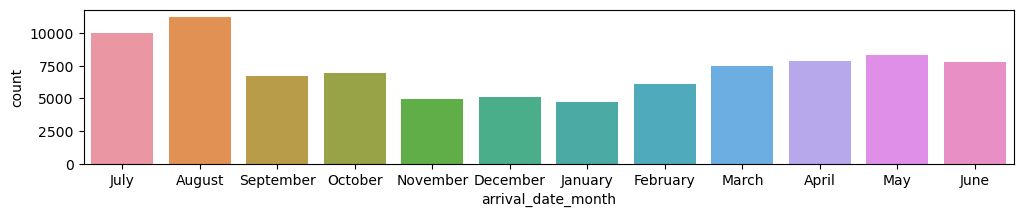

In [31]:
plt.figure(figsize=(12,2))
plt.title("")
sns.countplot(x=new_df1['arrival_date_month'])
plt.xticks()
plt.show()

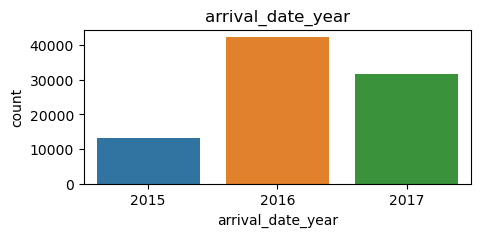

In [32]:
plt.figure(figsize=(5,2))
plt.title("arrival_date_year")
sns.countplot(x=new_df1['arrival_date_year'])
plt.xticks()
plt.show()

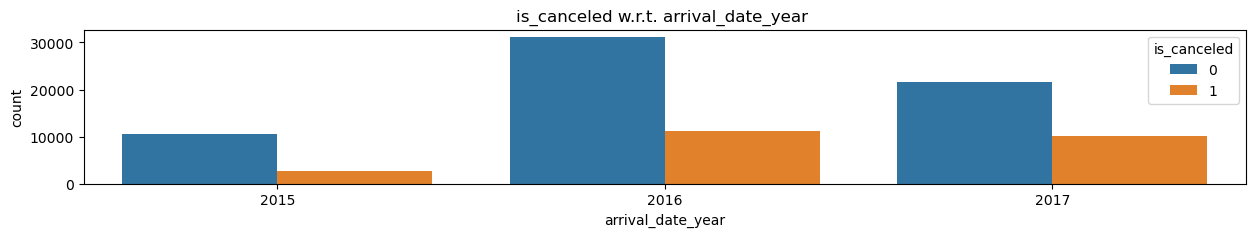

In [33]:
plt.figure(figsize=(15,2))
plt.title("is_canceled w.r.t. arrival_date_year ")
sns.countplot(x='arrival_date_year',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

In [34]:
new_df1['lead_time'].value_counts()

0      5978
1      3216
2      1927
3      1704
4      1570
       ... 
410       1
411       1
371       1
532       1
463       1
Name: lead_time, Length: 479, dtype: int64

<AxesSubplot:ylabel='lead_time'>

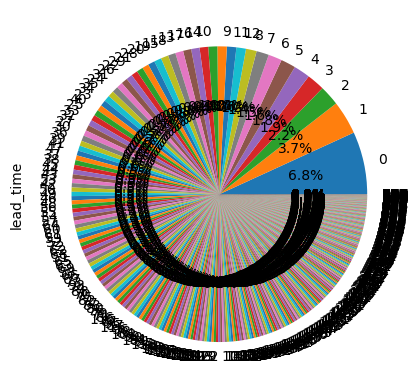

In [35]:
new_df1['lead_time'].value_counts().plot(kind="pie",autopct="%1.1f%%")

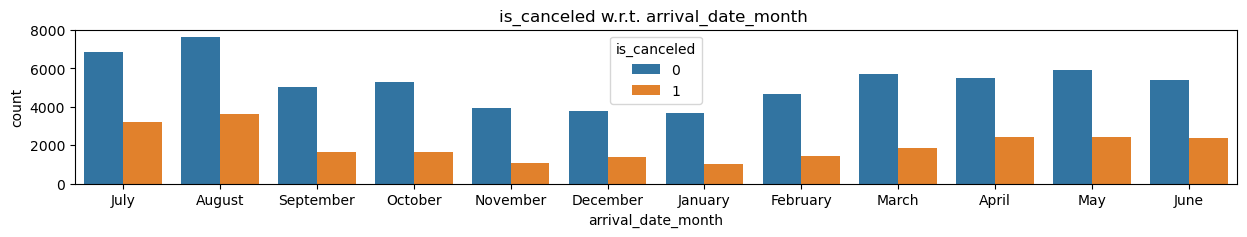

In [36]:
plt.figure(figsize=(15,2))
plt.title("is_canceled w.r.t. arrival_date_month ")
sns.countplot(x='arrival_date_month',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

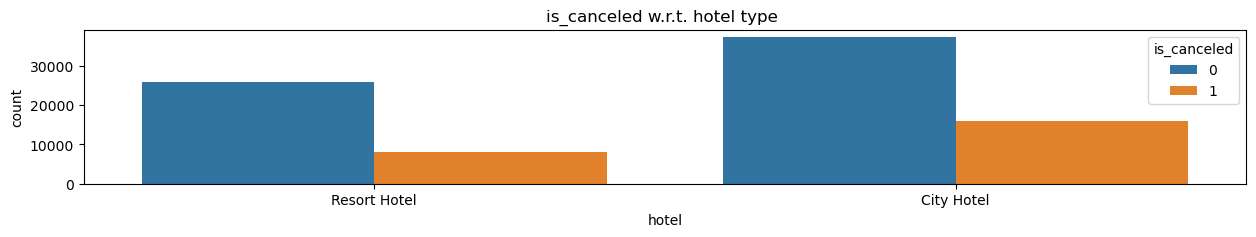

In [37]:
plt.figure(figsize=(15,2))
plt.title("is_canceled w.r.t. hotel type ")
sns.countplot(x='hotel',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

In [38]:
new_df1[(new_df1['hotel']=="City Hotel")&(new_df1['is_canceled']==1)].shape[0]/new_df1[new_df1['hotel']=="City Hotel"].shape[0] * 100

30.03855656210227

In [39]:
new_df1[(new_df1['hotel']=="Resort Hotel")&(new_df1['is_canceled']==1)].shape[0]/new_df1[new_df1['hotel']=="Resort Hotel"].shape[0] * 100

23.480923221855864

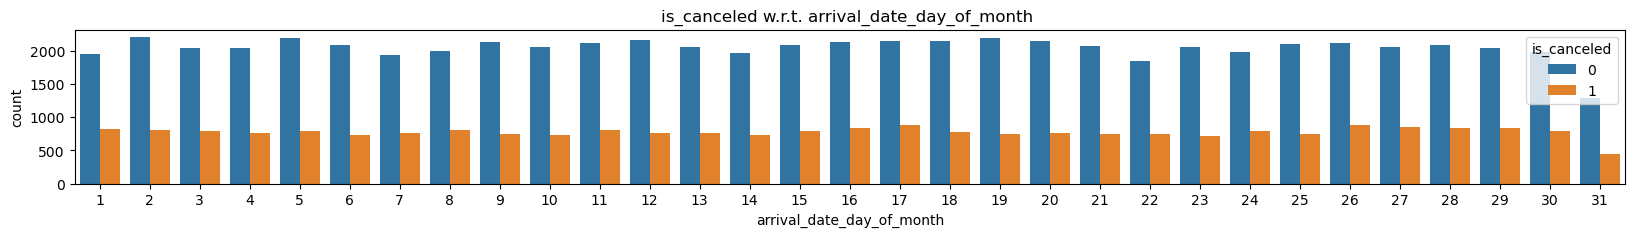

In [40]:
plt.figure(figsize=(20,2))
plt.title("is_canceled w.r.t. arrival_date_day_of_month ")
sns.countplot(x='arrival_date_day_of_month',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

In [41]:
new_df1['adults'].value_counts()

2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

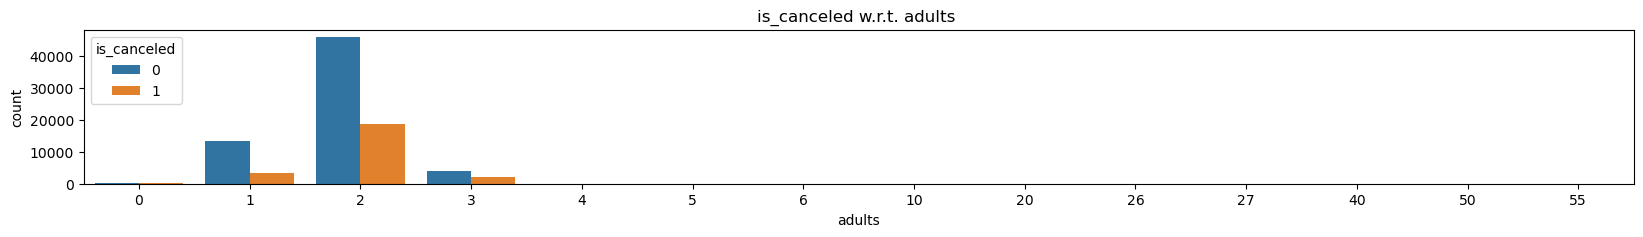

In [42]:
plt.figure(figsize=(20,2))
plt.title("is_canceled w.r.t. adults ")
sns.countplot(x='adults',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

In [43]:
new_df1['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

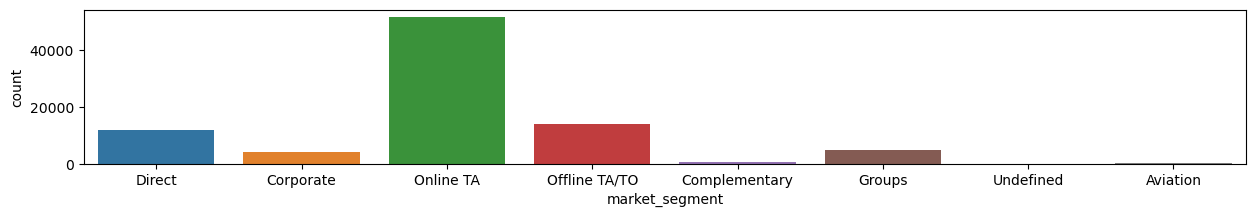

In [44]:
plt.figure(figsize=(15,2))
plt.title("")
sns.countplot(x=new_df1['market_segment'])
plt.xticks()
plt.show()

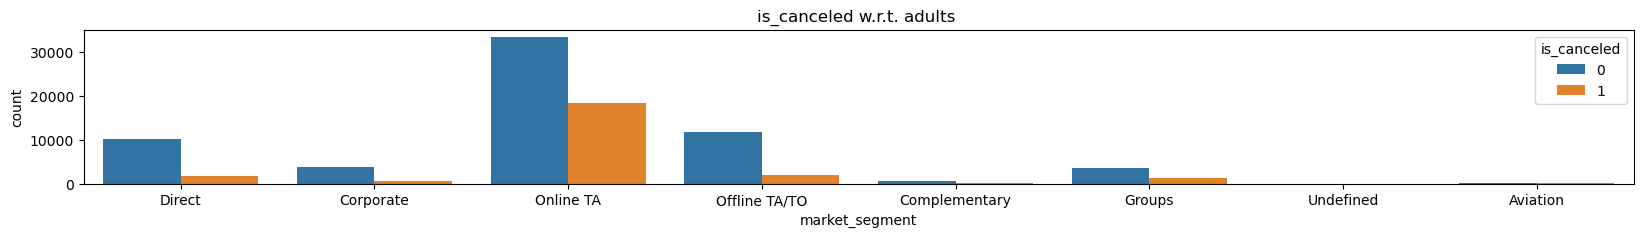

In [45]:
plt.figure(figsize=(20,2))
plt.title("is_canceled w.r.t. adults ")
sns.countplot(x='market_segment',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

In [46]:
new_df1['country'].value_counts()

PRT    27905
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

<AxesSubplot:ylabel='country'>

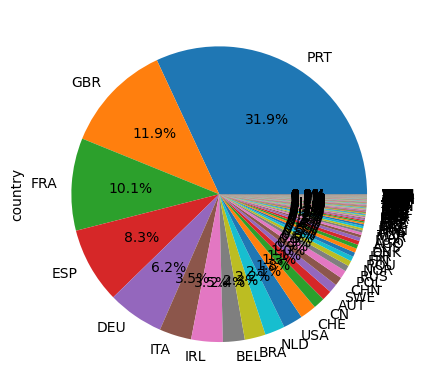

In [47]:
new_df1['country'].value_counts().plot(kind="pie",autopct="%1.1f%%")

<AxesSubplot:ylabel='customer_type'>

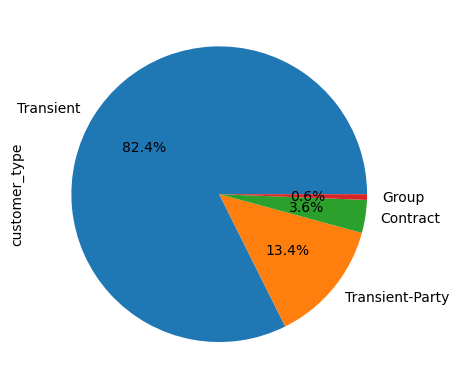

In [48]:
new_df1['customer_type'].value_counts().plot(kind="pie",autopct="%1.1f%%")

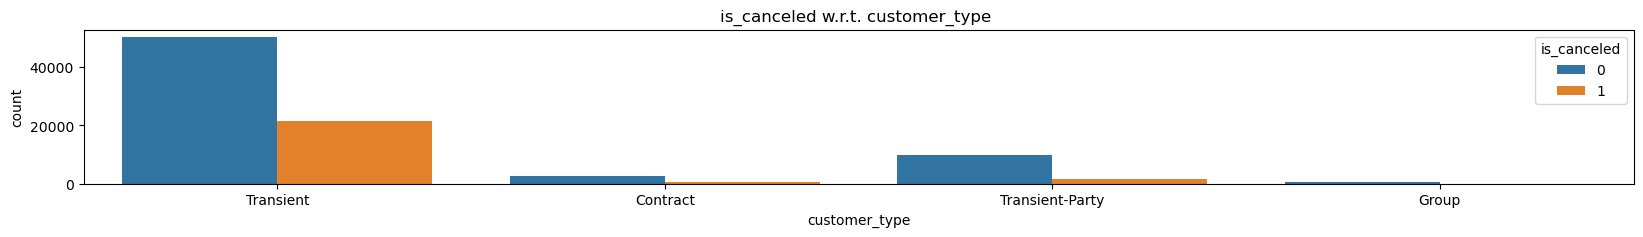

In [49]:
plt.figure(figsize=(20,2))
plt.title("is_canceled w.r.t. customer_type ")
sns.countplot(x='customer_type',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

In [50]:
new_df1['adr'].value_counts()

0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
55.11        1
33.65        1
31.41        1
31.80        1
157.71       1
Name: adr, Length: 8879, dtype: int64

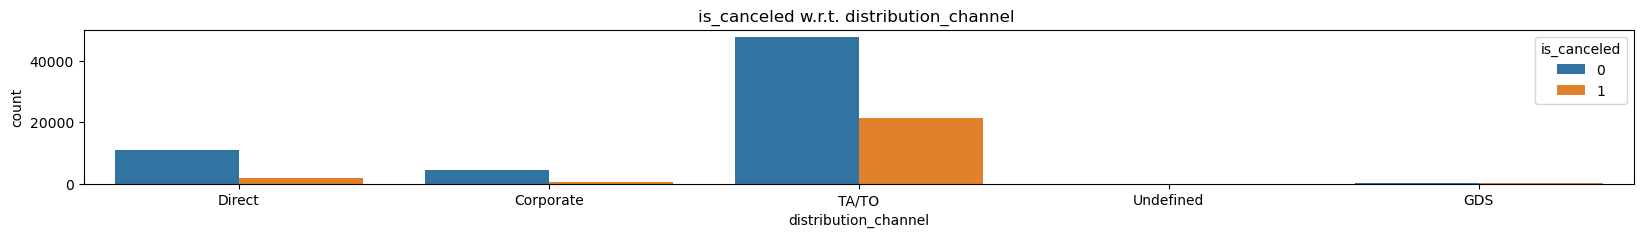

In [51]:
plt.figure(figsize=(20,2))
plt.title("is_canceled w.r.t. distribution_channel ")
sns.countplot(x='distribution_channel',hue="is_canceled",data=new_df1)
plt.xticks()
plt.show()

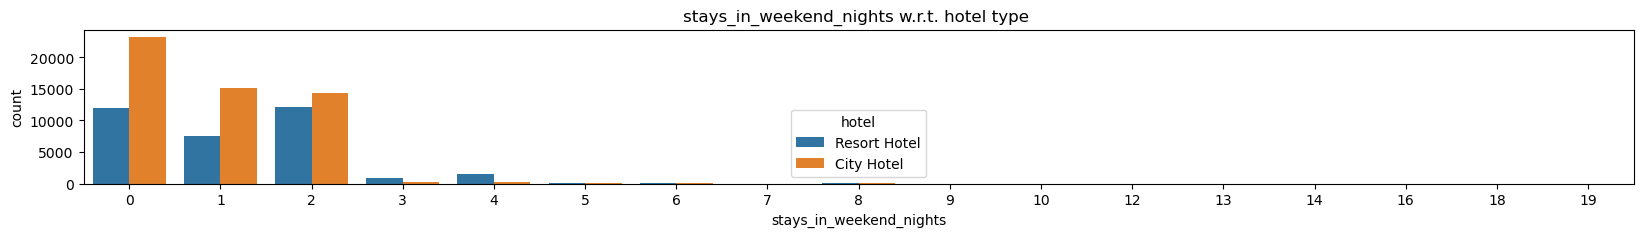

In [52]:
plt.figure(figsize=(20,2))
plt.title("stays_in_weekend_nights w.r.t. hotel type ")
sns.countplot(x='stays_in_weekend_nights',hue="hotel",data=new_df1)
plt.xticks()
plt.show()

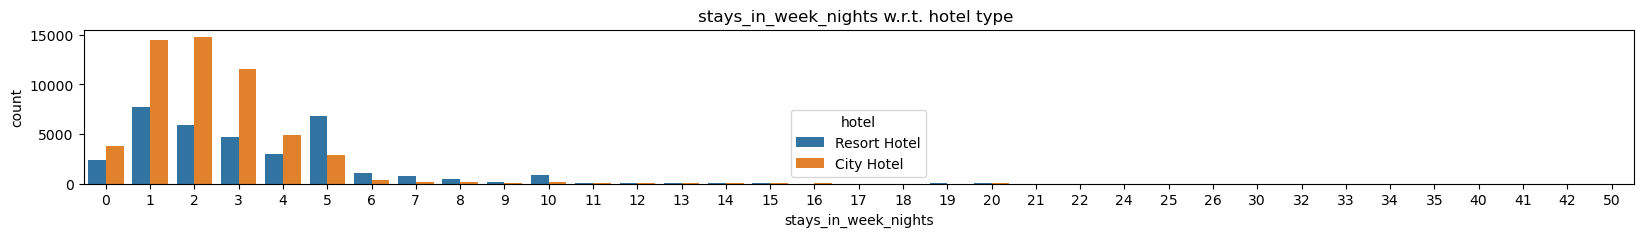

In [53]:
plt.figure(figsize=(20,2))
plt.title("stays_in_week_nights w.r.t. hotel type ")
sns.countplot(x='stays_in_week_nights',hue="hotel",data=new_df1)
plt.xticks()
plt.show()

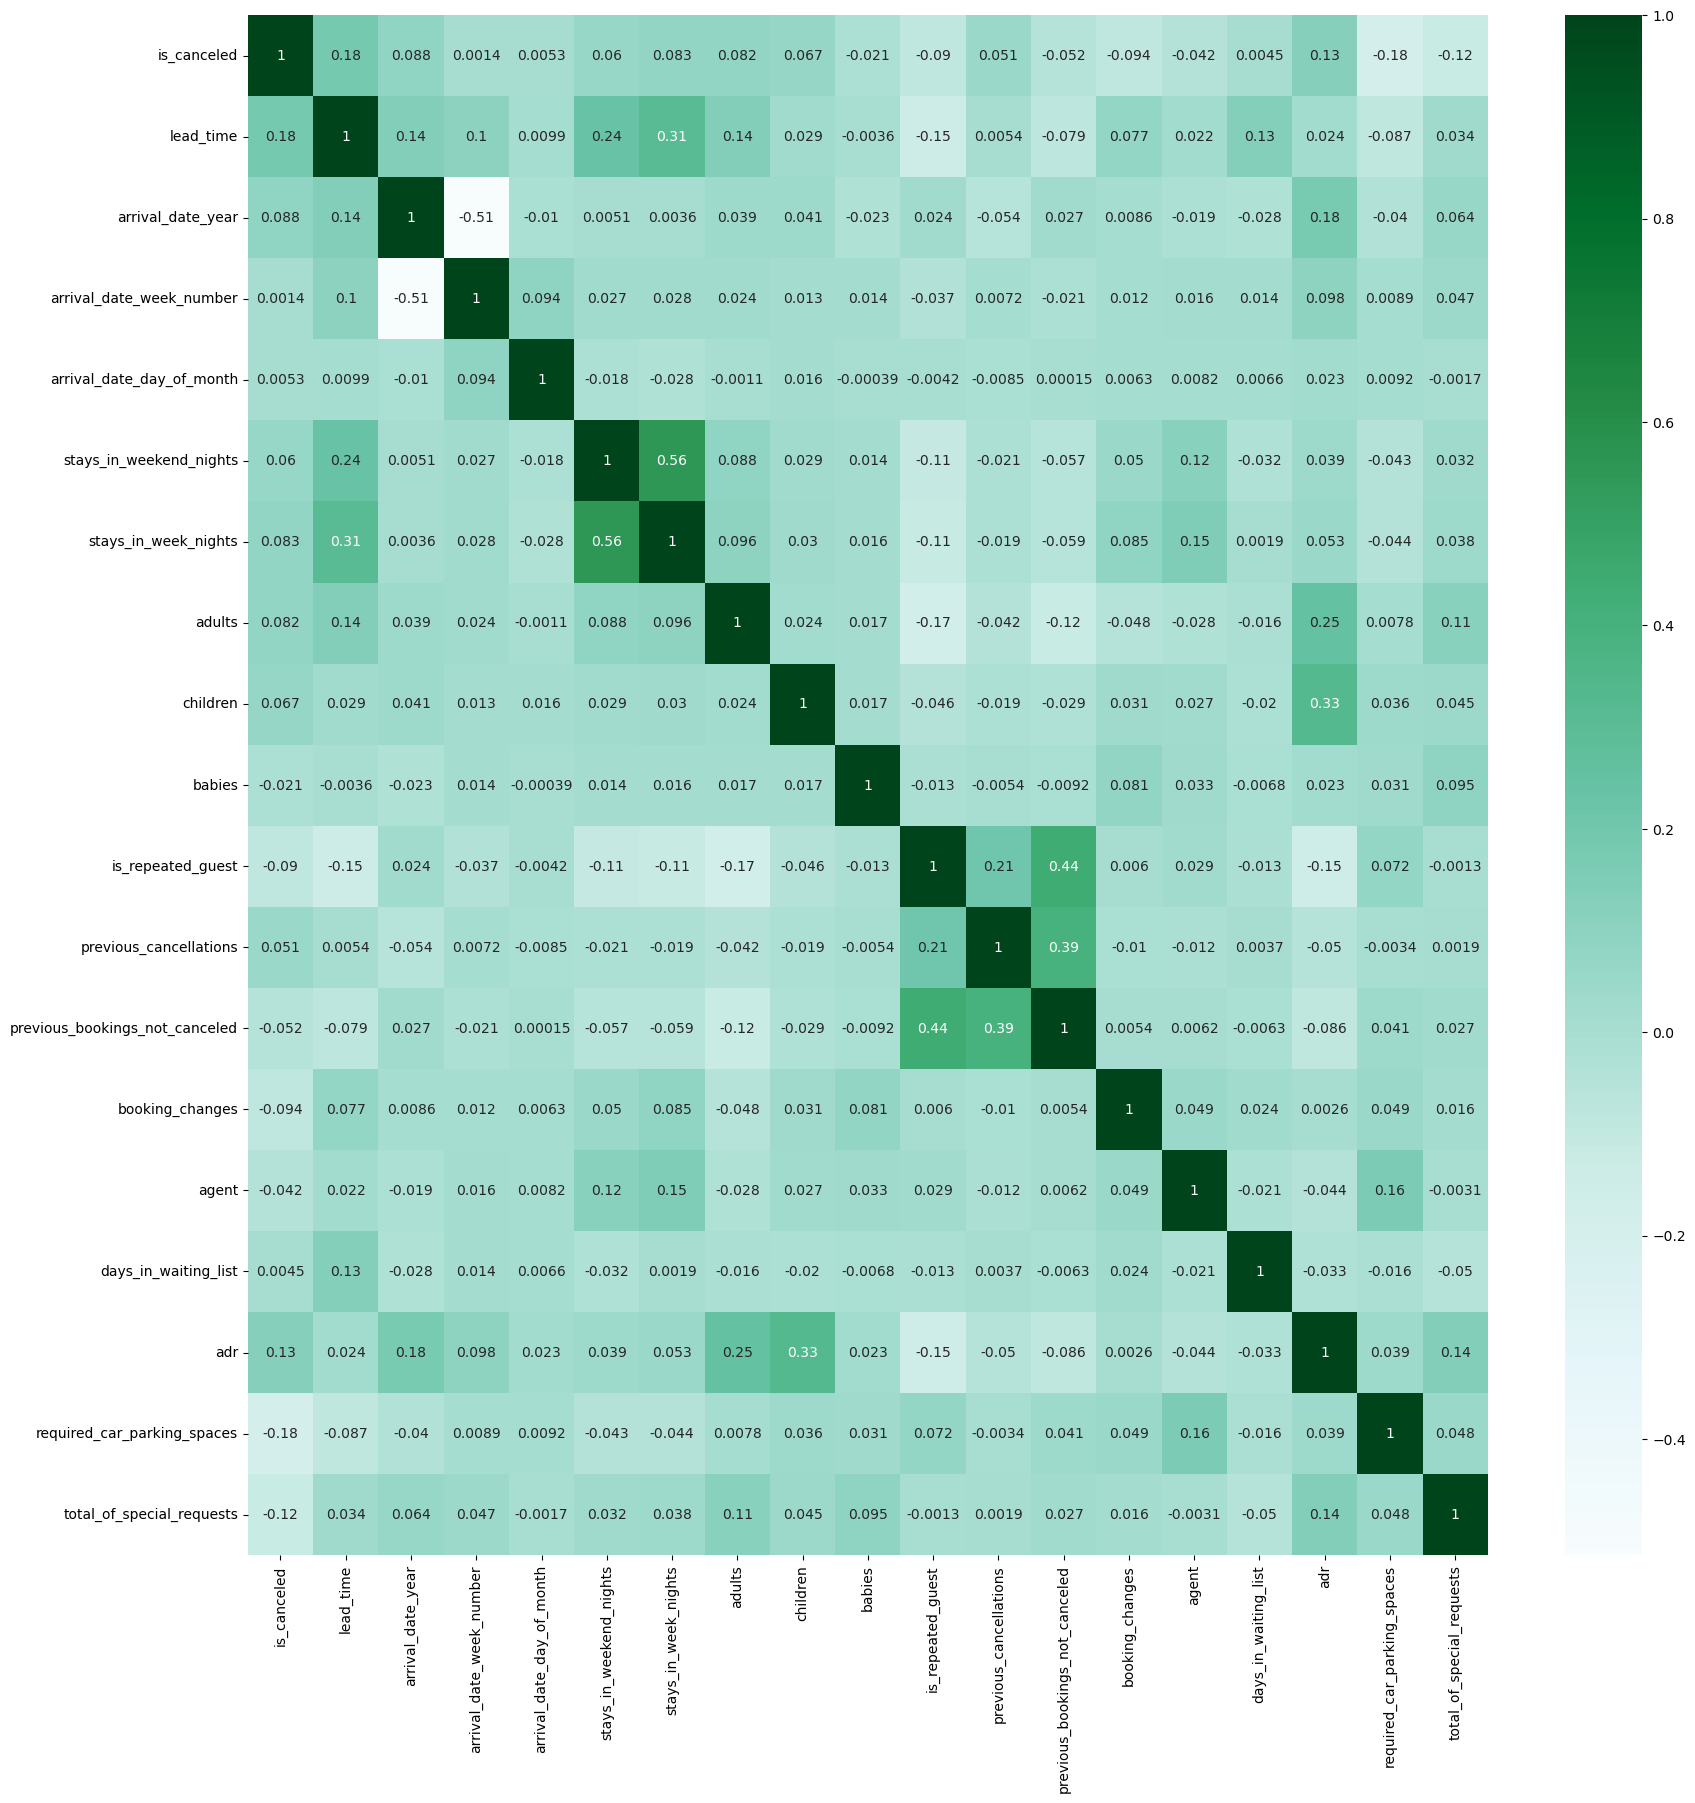

In [54]:
#Getting corelation between variables using heatmap
corr=new_df1.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='BuGn')
plt.savefig('Correlation matrix.png')

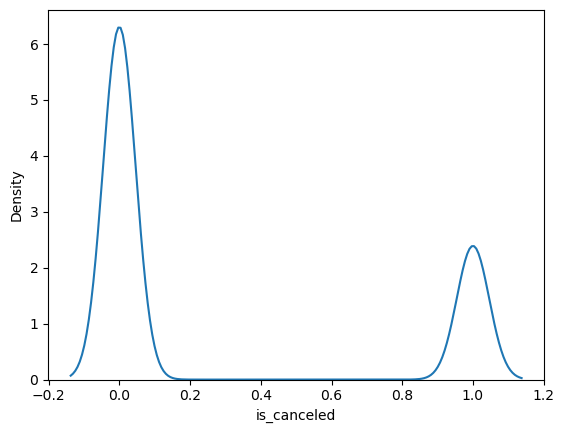

In [55]:
sns.kdeplot(new_df1['is_canceled'])
plt.show()

In [108]:
new_df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_year', 'reservation_month',
       'reservation_day', 'arrival_date_monthencoded', 'mealencoded',
       'market_segmentencoded', 'distribution_channelencoded',
       'reserved_room_typeencoded', 'assigned_room_typeencoded',
       'deposit_typeencoded', 'customer_typeencoded',
       'reservation_statusencoded', 'countryencoded'],
      dtype='object')

In [109]:
# T -test
from scipy import stats
data_group1 = new_df1['reservation_month']  
data_group2 = new_df1['is_canceled']  

t_statistic, p_value = stats.ttest_ind(data_group1, data_group2)
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
# Set the significance level
alpha = 0.05
# Interpret the p-value
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject null hypothesis")

T-Statistic: 543.0930
P-Value: 0.0000
Reject the null hypothesis


In [56]:
new_df1['reservation_status'].value_counts()

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

In [57]:
new_df1.groupby('reservation_status')['is_canceled'].value_counts()

reservation_status  is_canceled
Canceled            1              23011
Check-Out           0              63371
No-Show             1               1014
Name: is_canceled, dtype: int64

In [58]:
new_df1['is_repeated_guest'].value_counts()

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

In [59]:
new_df1.groupby('is_repeated_guest')['is_canceled'].value_counts()

is_repeated_guest  is_canceled
0                  0              60217
                   1              23764
1                  0               3154
                   1                261
Name: is_canceled, dtype: int64

In [60]:
new_df1['days_in_waiting_list'].value_counts()

0      86536
63        53
87        25
44        23
15        22
       ...  
79         1
120        1
160        1
85         1
36         1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [61]:
# The most of users who cancelled booking are those who booked City Hotel
# Most of users are coming from Online TA market segment
# Most of users from City Hotel type only stays in weekend nights
# In August month bookings was more.
# Most of bookings are from TA/TO distribution channel

In [62]:
# data is imbalanced
new_df1['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

In [63]:
# new feature creation
new_df1['reservation_status_date']=pd.to_datetime(new_df1['reservation_status_date'])

In [64]:
new_df1["reservation_year"]=new_df1['reservation_status_date'].dt.year
new_df1["reservation_month"]=new_df1['reservation_status_date'].dt.month
new_df1["reservation_day"]=new_df1['reservation_status_date'].dt.day

In [65]:
new_df1=new_df1.drop("reservation_status_date",axis=1)

In [66]:
cat_columns=['hotel',
  'arrival_date_month',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status']

In [67]:
# Encoding
for i in cat_columns:
    if new_df1[i].nunique() < 15:
       print(i,":",new_df1[i].unique())


hotel : ['Resort Hotel' 'City Hotel']
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status : ['Check-Out' 'Canceled' 'No-Show']


In [68]:
# simple encoding 
new_df1=new_df1.replace({"Resort Hotel":0,'City Hotel':1})

In [69]:
new_df1["country"].nunique()

177

In [70]:
labe_encod_req_df=new_df1[["arrival_date_month","meal","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type","reservation_status","country"]]

In [71]:
# label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in labe_encod_req_df.columns:
         new_df1[i + "encoded"]=encoder.fit_transform(new_df1[i])

In [72]:
new_df1=new_df1.drop(["arrival_date_month","meal","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type","reservation_status","country"],axis=1)

In [73]:
new_df1.shape

(87396, 33)

In [75]:
# spliting data
from sklearn.model_selection import train_test_split,cross_val_score
x=new_df1.drop("is_canceled",axis=1)
y=new_df1['is_canceled']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape[0],y_train.shape[0],x_test.shape[0],y_test.shape[0]

(69916, 69916, 17480, 17480)

In [99]:
# data imbalanced treatment 
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [100]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [101]:
x_train_scaled=scaler.fit_transform(x_train_smote)
x_test_scaled=scaler.transform(x_test)

In [102]:
# Feature selection using RFE with logistic regression
from sklearn.feature_selection import RFE
model=LogisticRegression(random_state=42)
rfe=RFE(model,n_features_to_select=10)

In [103]:
x_train_rfe=rfe.fit_transform(x_train_scaled,y_train_smote)
x_test_rfe=rfe.transform(x_test_scaled)

In [104]:
# model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

models={"logi_regre":LogisticRegression(random_state=42),
        "Random_fore":RandomForestClassifier(random_state=42)}


In [105]:
def evaluate_model(model,x_test,y_test):
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred)
    print(model)
    print("accuracy_score:",accuracy*100)
    print("precision_score:",precision*100)
    print("recall_score:",recall*100)
    print("f1_score:",f1score*100)
    print("classification report:",classification_report(y_test,y_pred))

In [110]:
for model_name , model in models.items():
    model.fit(x_train_rfe,y_train_smote)
    cv_scores=cross_val_score(model,x_train_rfe,y_train_smote,cv=5,scoring="accuracy")
    print(cv_scores)

    evaluate_model(model,x_test_rfe,y_test)

[0.97777887 0.97856615 0.97654595 0.97812269 0.97896034]
LogisticRegression(random_state=42)
accuracy_score: 98.93592677345538
precision_score: 100.0
recall_score: 96.16257478852899
f1_score: 98.04375262936475
classification report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12633
           1       1.00      0.96      0.98      4847

    accuracy                           0.99     17480
   macro avg       0.99      0.98      0.99     17480
weighted avg       0.99      0.99      0.99     17480

[0.99970438 0.99842326 0.98787879 0.98886425 0.98945553]
RandomForestClassifier(random_state=42)
accuracy_score: 99.94851258581235
precision_score: 99.8146622734761
recall_score: 100.0
f1_score: 99.90724518190251
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12633
           1       1.00      1.00      1.00      4847

    accuracy                           1

In [82]:
# model is overfitting

In [111]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Create a base model
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_rfe, y_train_smote)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.99


0.9994851258581235